In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [ ]:
!kaggle datasets download -d mrwellsdavid/unsw-nb15 --unzip

Dataset URL: https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15
License(s): unknown
 98% 146M/149M [00:02<00:00, 70.2MB/s]
100% 149M/149M [00:02<00:00, 60.5MB/s]


In [ ]:
train = pd.read_csv('UNSW_NB15_training-set.csv')
test = pd.read_csv('UNSW_NB15_testing-set.csv')

In [ ]:
train

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [ ]:
test

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [ ]:
df=pd.concat([train,test]).reset_index(drop=True)

In [ ]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
257669,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
257670,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
257671,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,257673.0,NaN,NaN,NaN,72811.823858,48929.917641,1.0,32210.0,64419.0,110923.0,175341.0
dur,257673.0,NaN,NaN,NaN,1.246715,5.974305,0.0,0.000008,0.004285,0.685777,59.999989
proto,257673,133,tcp,123041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
service,257673,13,-,141321,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,257673,11,FIN,117164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spkts,257673.0,NaN,NaN,NaN,19.777144,135.947152,1.0,2.0,4.0,12.0,10646.0
dpkts,257673.0,NaN,NaN,NaN,18.514703,111.985965,0.0,0.0,2.0,10.0,11018.0
sbytes,257673.0,NaN,NaN,NaN,8572.951803,173773.880605,24.0,114.0,528.0,1362.0,14355774.0
dbytes,257673.0,NaN,NaN,NaN,14387.287543,146199.281938,0.0,0.0,178.0,1064.0,14657531.0
rate,257673.0,NaN,NaN,NaN,91253.91244,160344.636693,0.0,30.789277,2955.664893,125000.0003,1000000.003


In [ ]:
drop_list = ['id']
train.drop(drop_list, axis=1, inplace=True)
test.drop(drop_list, axis=1, inplace=True)
df.drop(drop_list, axis=1, inplace=True)
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
257669,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,Shellcode,1
257670,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1
257671,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,Generic,1


In [ ]:
df.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label      

In [ ]:
df.dtypes

dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_l

In [ ]:
df.duplicated().sum()

94928

In [ ]:
df_duplicates = df[df.duplicated()]
print(df_duplicates)

              dur proto service state  spkts  dpkts  sbytes  dbytes  \
10       0.000000   arp       -   INT      1      0      46       0   
11       0.000000   arp       -   INT      1      0      46       0   
39      59.995674   arp       -   INT      2      0      92       0   
41      59.995678   arp       -   INT      2      0      92       0   
53      14.846565   tcp       -   REQ     22      0     990       0   
...           ...   ...     ...   ...    ...    ...     ...     ...   
257667   0.000006   udp     dns   INT      2      0     114       0   
257668   0.000009   udp     dns   INT      2      0     114       0   
257670   0.000009   udp     dns   INT      2      0     114       0   
257671   0.000009   udp     dns   INT      2      0     114       0   
257672   0.000009   udp     dns   INT      2      0     114       0   

                 rate  sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  \
10           0.000000     0  ...                 2               2   
11     

In [ ]:
df = df.drop_duplicates()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dur,162745.0,1.252714e+00,5.093951e+00,0.0,0.001723,3.289570e-01,9.560870e-01,5.999999e+01
spkts,162745.0,2.860947e+01,1.689001e+02,1.0,4.000000,1.000000e+01,2.000000e+01,1.064600e+04
dpkts,162745.0,2.851158e+01,1.378713e+02,0.0,2.000000,8.000000e+00,1.800000e+01,1.101800e+04
sbytes,162745.0,1.291327e+04,2.169121e+05,24.0,510.000000,9.220000e+02,2.456000e+03,1.435577e+07
dbytes,162745.0,2.229745e+04,1.807485e+05,0.0,178.000000,3.540000e+02,2.478000e+03,1.465753e+07
rate,162745.0,3.880025e+04,1.159475e+05,0.0,25.575756,8.185405e+01,4.002287e+03,1.000000e+06
sttl,162745.0,1.465986e+02,1.074557e+02,0.0,31.000000,6.200000e+01,2.540000e+02,2.550000e+02
dttl,162745.0,1.257625e+02,1.167039e+02,0.0,29.000000,2.900000e+01,2.520000e+02,2.540000e+02
sload,162745.0,4.864382e+07,2.059415e+08,0.0,9029.086914,6.873062e+04,1.129970e+06,5.988000e+09
dload,162745.0,1.038744e+06,2.968526e+06,0.0,1919.402222,6.931899e+03,4.121056e+05,2.242273e+07


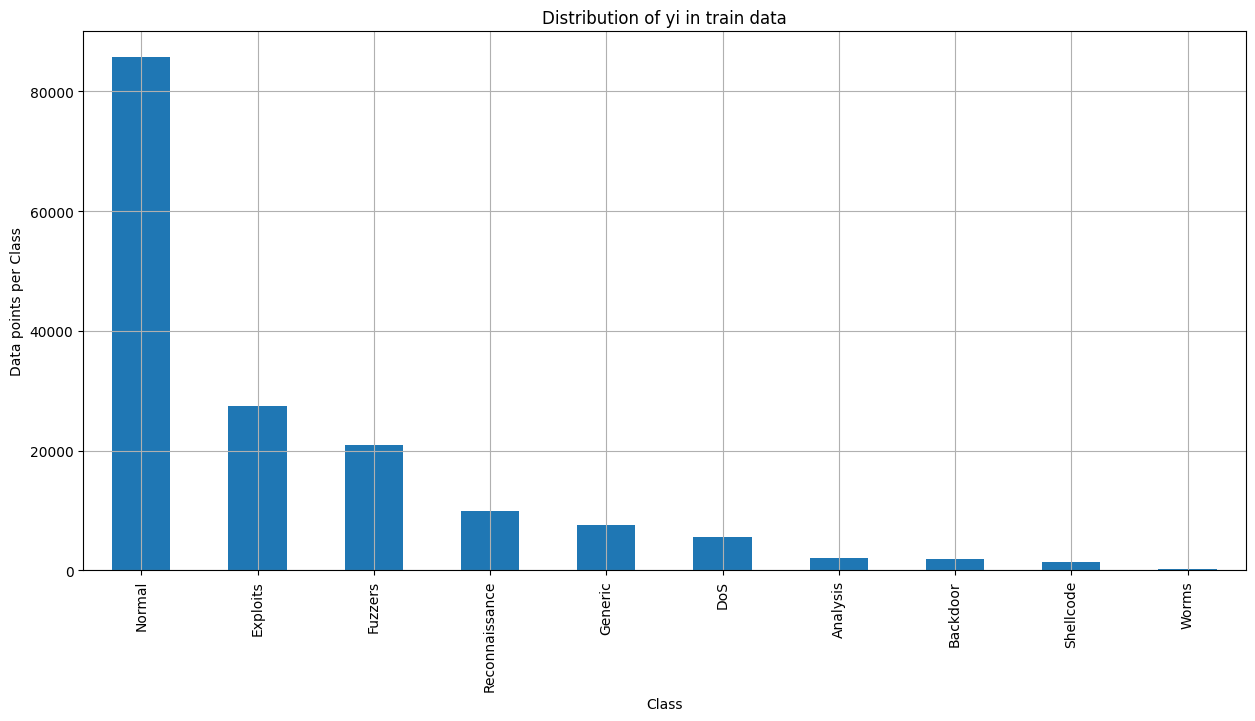

In [ ]:
plt.figure(figsize=(15,7))
class_distribution = df['attack_cat'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

In [ ]:
#drop_list = ['label']
#df.drop(drop_list, axis=1, inplace=True)
#df

In [ ]:
drop_list = ['attack_cat']
df.drop(drop_list, axis=1, inplace=True)
df

<ipython-input-9-b953ea421c45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(drop_list, axis=1, inplace=True)


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,...,2,1,3,0,0,0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257599,1.914309,tcp,smtp,FIN,74,30,69997,2132,53.805315,62,...,1,1,1,0,0,0,18,1,0,1
257609,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,62,...,1,1,1,0,0,0,2,1,0,1
257631,0.996503,tcp,pop3,FIN,20,30,942,16684,49.171955,62,...,1,1,1,0,0,0,7,1,0,1
257637,1.557125,tcp,smtp,FIN,28,22,12601,1954,31.468251,62,...,1,1,2,0,0,0,2,1,0,1


Label Encoding

In [ ]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe().T

,count,unique,top,freq
proto,162745,133,tcp,116801
service,162745,13,-,101287
state,162745,11,FIN,111833
attack_cat,162745,10,Normal,85722


In [ ]:
df['proto'].unique()

array(['udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip',
       'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp',
       'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6',
       'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd',
       'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts',
       'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn',
       'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines',
       'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp',
       'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp',
       'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna',
       'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep',
       'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', 'iso-ip',


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['proto']= label_encoder.fit_transform(df['proto'])
df['proto'].unique()

<ipython-input-11-e5ccbaa6e44b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['proto']= label_encoder.fit_transform(df['proto'])


array([119,   6, 113,  42,  78,  97,  32,  30,  45,  50, 108,   4,  13,
        23,  25,  77,  86, 129,  73,  19,  33,  84, 116, 117, 130,  65,
        66,  58,  89,  75,  68,  67,   0,  38,  20,  39, 115,  52,  98,
        53,  56,  40,  69,  34,  92,  71,  74, 101, 114,  54,   3,  55,
        12,  93,  51,  62,  94,  16, 128,  87,  10, 110, 127, 124, 118,
       122,  76,  22,  24, 112, 105,  64,  72,   7,  48,   2,  70,  26,
        83,  31,  41,  82,  88,  96,  11,   8,  43,   9, 111, 123,  47,
        15,  61, 126, 100,  99, 131,  44,  90, 120,  28,  60,  27,  80,
         5,   1,  46, 104,  14,  57,  79, 125,  63, 132,  21,  35, 109,
       107, 121, 102, 103,  59,  85,  29,  17,  18,  95,  49,  81, 106,
        36,  37,  91])

In [ ]:
df['service'].unique()

array(['-', 'http', 'ftp', 'ftp-data', 'smtp', 'pop3', 'dns', 'snmp',
       'ssl', 'dhcp', 'irc', 'radius', 'ssh'], dtype=object)

In [ ]:
df['service']= label_encoder.fit_transform(df['service'])
df['service'].unique()

<ipython-input-13-02439da5b8b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['service']= label_encoder.fit_transform(df['service'])


array([ 0,  5,  3,  4,  9,  7,  2, 10, 12,  1,  6,  8, 11])

In [ ]:
df['state'].unique()

array(['INT', 'FIN', 'REQ', 'ACC', 'CON', 'RST', 'CLO', 'ECO', 'PAR',
       'URN', 'no'], dtype=object)

In [ ]:
df['state']= label_encoder.fit_transform(df['state'])
df['state'].unique()

<ipython-input-15-c2b9f9be05a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state']= label_encoder.fit_transform(df['state'])


array([ 5,  4,  7,  0,  2,  8,  1,  3,  6,  9, 10])

In [ ]:
#df['attack_cat'].unique()

In [ ]:
#df[['attack_cat']]=df[['attack_cat']].replace(to_replace={'Normal':'0'})
#df['attack_cat'].unique()

In [ ]:
#df['attack_cat']= label_encoder.fit_transform(df['attack_cat'])
#df['attack_cat'].unique()

In [ ]:
df.dtypes

dur                  float64
proto                  int64
service                int64
state                  int64
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_l

Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import plotly.graph_objects as go
import pandas as pd # Import pandas for DataFrame manipulation

# Assuming 'df' is your DataFrame and 'label' is your target variable
ind_cols = [col for col in df.columns if col!='label']
dep_cols = 'label'

x=df[ind_cols]
y=df[dep_cols]

# Convert non-numerical columns to numerical using one-hot encoding
x = pd.get_dummies(x) # This will handle any string columns

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_, columns=["Score"])
df_cols = pd.DataFrame(x.columns)

feature_score = pd.concat([df_cols, df_scores], axis=1)
feature_score.columns=['Feature','Score']

selected_cols = feature_score.nlargest(15,'Score')['Feature'].values

feature_score.sort_values(by=['Score'],ascending=True,inplace=True)

fig = go.Figure(go.Bar(
               x=feature_score['Score'].tail(20),
               y=feature_score['Feature'].tail(20),
               orientation='h'
               ))

fig.update_layout(title="Top 20 Features",
                  xaxis=dict(title="Scores"),
                  yaxis=dict(title="Features"),
                  height=1200,
                  showlegend=False,
                 )
fig.show()

In [ ]:
x_new=df[selected_cols]
df = pd.concat([x_new, y], axis=1)
selected_cols

array(['sload', 'stcpb', 'dtcpb', 'dload', 'rate', 'sbytes', 'dbytes',
       'sinpkt', 'sjit', 'response_body_len', 'sttl', 'dmean', 'dttl',
       'djit', 'smean'], dtype=object)

Normalizing Data

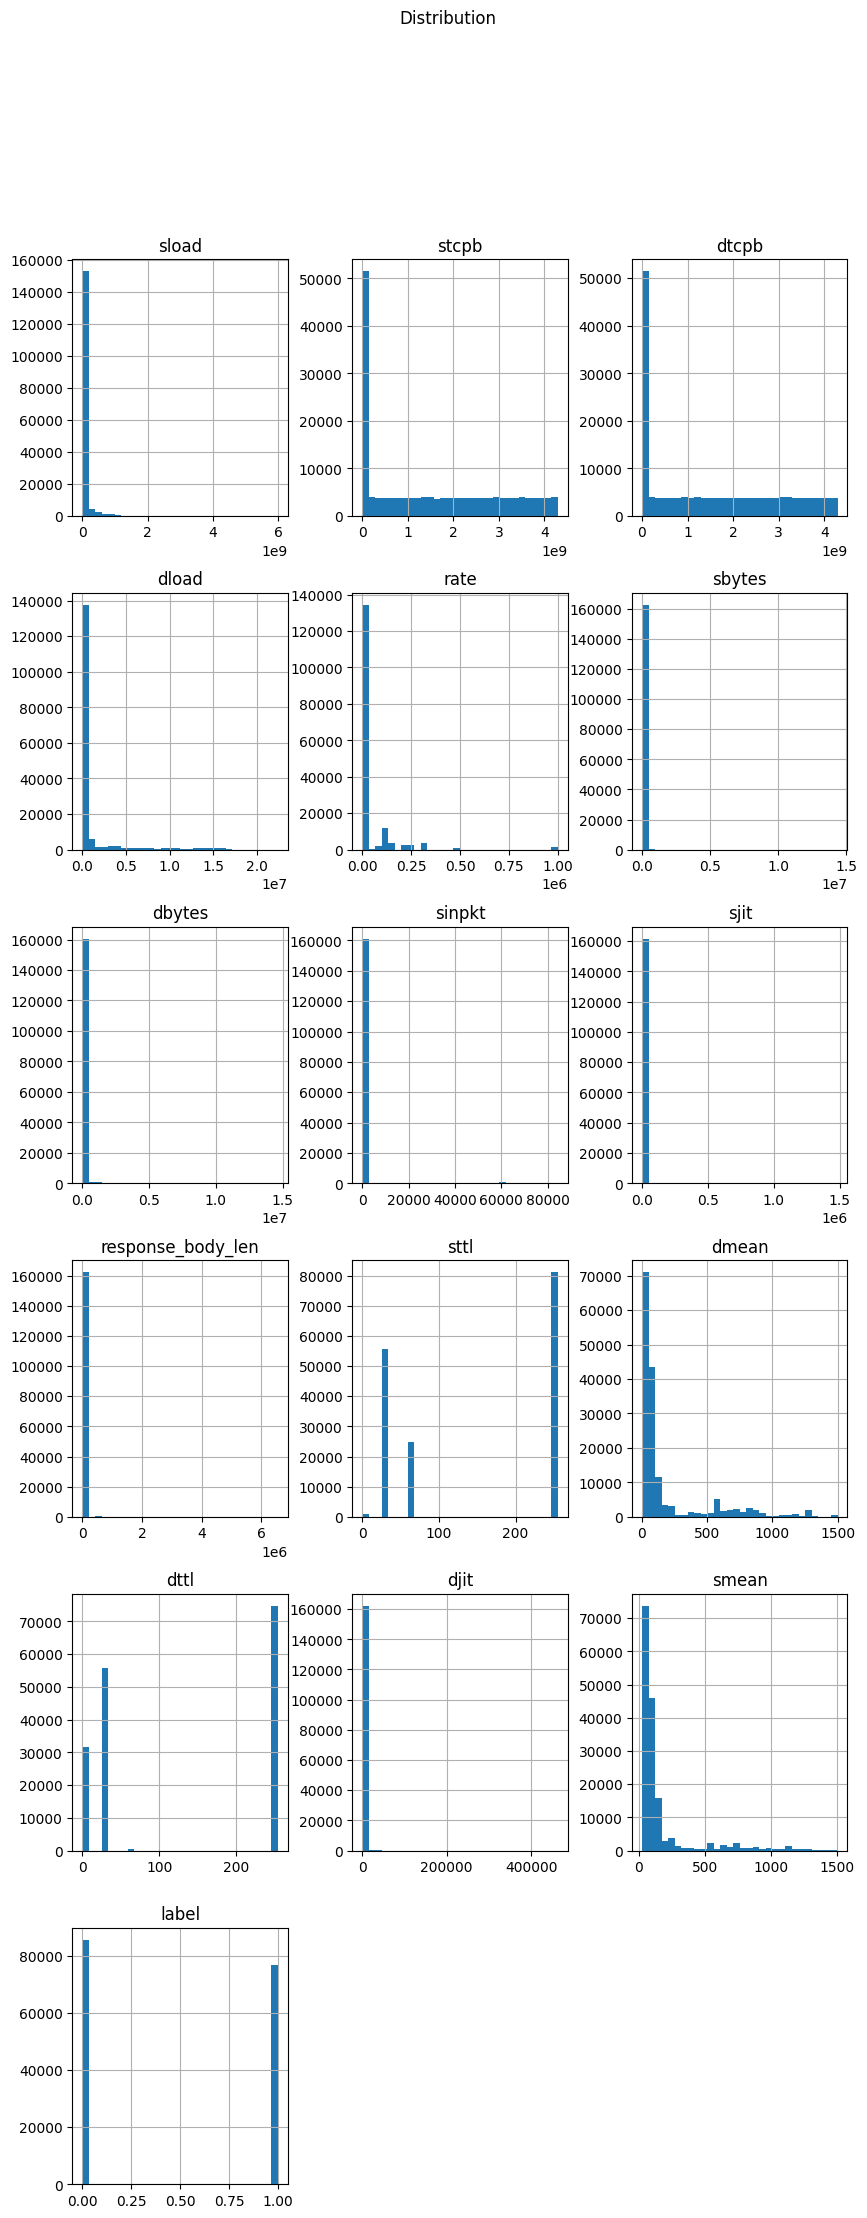

In [ ]:
df.hist(figsize=(10,25), layout=(6,3), bins=30, grid=True)
plt.suptitle("Distribution")
plt.show()

In [ ]:
from scipy.stats import skew
from scipy.stats import kurtosis

print("Attributes\t\tSkewness\t\tKurtosis")
for cols in df.columns:
  print(cols,"\t\t=\t",skew(df[cols], axis=0, bias=True), end="\t")
  print(kurtosis(df[cols], axis=0, bias=True))

Attributes		Skewness		Kurtosis
sload 		=	 9.392139560225809	131.89309993327026
stcpb 		=	 0.40804624410839163	-1.2635176102080359
dtcpb 		=	 0.4140648271055789	-1.256067873594466
dload 		=	 3.6202312627275344	12.840547779186908
rate 		=	 5.333221251296072	36.378623201747665
sbytes 		=	 38.51613801451763	1688.2667722721212
dbytes 		=	 36.13579638295465	2179.028308299288
sinpkt 		=	 14.339898285815572	209.686555967662
sjit 		=	 19.058025961621844	406.9811235064792
response_body_len 		=	 62.73803348614081	5424.615824900924
sttl 		=	 -0.019311506564148182	-1.9650429222717987
dmean 		=	 2.2020056272564457	4.142968822691314
dttl 		=	 0.14063949347328883	-1.9465534061984366
djit 		=	 36.299912792188444	2303.066783247675
smean 		=	 2.9077376854610044	7.996496653801406
label 		=	 0.10705648208886914	-1.9885389096427557


In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
x = np.log(x+1)

In [ ]:
#cube root
#x = np.cbrt(x)

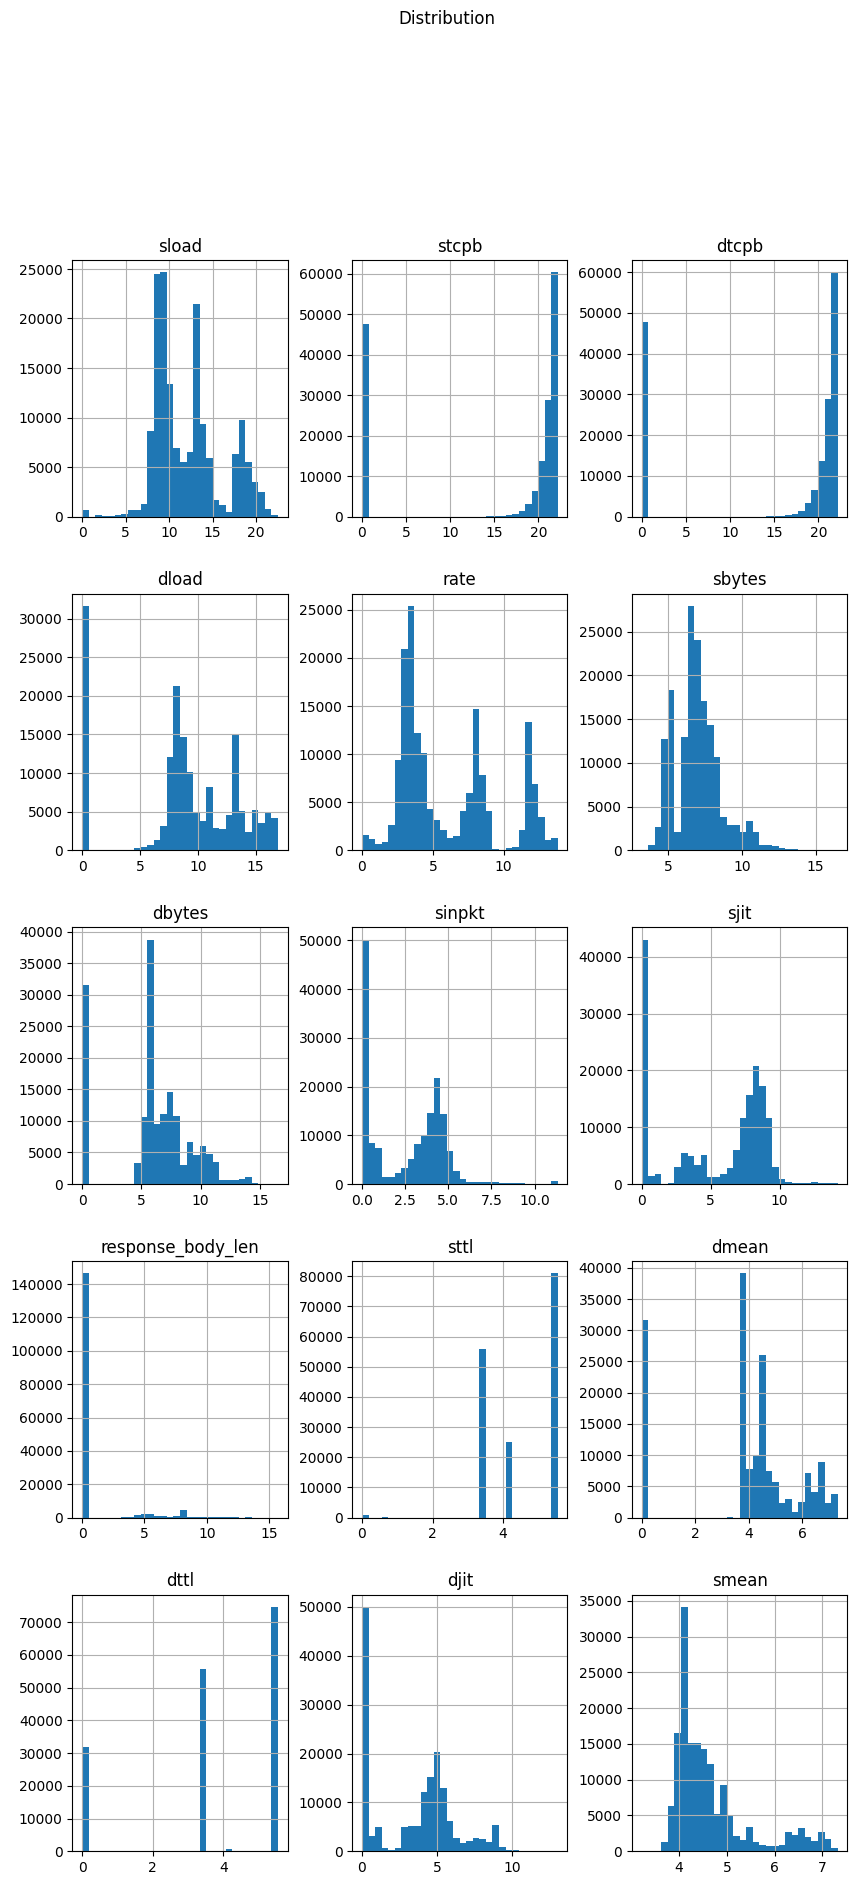

In [ ]:
x.hist(figsize=(10,25), layout=(6,3), bins=30, grid=True)
plt.suptitle("Distribution")
plt.show()

In [ ]:
print("Attributes\t\tSkewness\t\tKurtosis")
for cols in x.columns:
  print(cols,"\t\t=\t",skew(x[cols], axis=0, bias=True), end="\t")
  print(kurtosis(x[cols], axis=0, bias=True))

Attributes		Skewness		Kurtosis
sload 		=	 0.5516667445634923	-0.23573053275509226
stcpb 		=	 -0.8885198468475591	-1.1809553097566736
dtcpb 		=	 -0.8878975873295343	-1.1820796543298298
dload 		=	 -0.5419276467079585	-0.6252759912135453
rate 		=	 0.6433763345762683	-0.8560361327340238
sbytes 		=	 0.9172629239203207	1.705603633123424
dbytes 		=	 -0.4062428584595446	-0.3224751927452143
sinpkt 		=	 0.32325114425270984	-0.3498717984369333
sjit 		=	 -0.3969459278992273	-1.4331273840740164
response_body_len 		=	 3.2303052462310577	9.910933374545301
sttl 		=	 -0.5637613443186523	0.1897623987116619
dmean 		=	 -0.7451839741152828	-0.30800504540122464
dttl 		=	 -0.8348026937134448	-0.6522878343789529
djit 		=	 0.14753867653538133	-0.9680271019834659
smean 		=	 1.5806582895004573	1.6584128435583088


Sampling

In [ ]:
df=pd.concat([x, y], axis=1)
df

,sload,stcpb,dtcpb,dload,rate,sbytes,dbytes,sinpkt,sjit,response_body_len,sttl,dmean,dttl,djit,smean,label
0,19.010486,0.000000,0.000000,0.000000,11.417626,6.208590,0.000000,0.010940,0.000000,0.0,5.541264,0.000000,0.000000,0.000000,5.517453,0
1,20.596568,0.000000,0.000000,0.000000,11.736077,7.474772,0.000000,0.007968,0.000000,0.0,5.541264,0.000000,0.000000,0.000000,6.782192,0
2,20.565910,0.000000,0.000000,0.000000,12.206078,6.974479,0.000000,0.004988,0.000000,0.0,5.541264,0.000000,0.000000,0.000000,6.282267,0
3,20.212440,0.000000,0.000000,0.000000,12.023757,6.803505,0.000000,0.005982,0.000000,0.0,5.541264,0.000000,0.000000,0.000000,6.111467,0
4,20.561217,0.000000,0.000000,0.000000,11.512935,7.662468,0.000000,0.009950,0.000000,0.0,5.541264,0.000000,0.000000,0.000000,6.969791,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257599,12.572703,20.136825,19.321202,9.061147,4.003787,11.156222,7.665285,3.303728,7.788772,0.0,4.143135,4.276666,5.533389,4.519325,6.853299,1
257609,8.785723,21.837381,21.267531,13.726341,4.699544,8.034955,12.963330,4.064179,8.119509,0.0,4.143135,7.134891,5.533389,7.369363,3.871201,1
257631,8.879908,15.539126,20.170328,11.771265,3.915456,6.849066,9.722265,3.978700,8.008451,0.0,4.143135,6.322565,5.533389,7.816214,3.871201,1
257637,11.041783,21.381852,21.628384,9.168257,3.480263,9.441611,7.578145,4.071951,8.205823,0.0,4.143135,4.499810,5.533389,4.731081,6.111467,1


Data Sampling

In [ ]:
label_counts = df['label'].value_counts()
fig = go.Figure(data=[go.Bar(x=['0', '1'], y=label_counts.values, text=label_counts.values)])
fig.update_layout(title='Total Number of 0s and 1s in Label Attribute',
                  xaxis_title='Label',
                  yaxis_title='Count')
fig.show()

In [ ]:
# prompt: undersample both classes and make 20000 instances from each class

from imblearn.under_sampling import RandomUnderSampler

# Separate features and target variable
X = df.drop('label', axis=1)
y = df['label']

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy={0: 20000, 1: 20000}, random_state=42)

# Resample the dataset
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create a new DataFrame from the resampled data
df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['label'])], axis=1)

# Verify the new class distribution
print(df['label'].value_counts())


label
0    20000
1    20000
Name: count, dtype: int64


In [ ]:
label_counts = df['label'].value_counts()
fig = go.Figure(data=[go.Bar(x=['0', '1'], y=label_counts.values, text=label_counts.values)])
fig.update_layout(title='Total Number of 0s and 1s in Label Attribute',
                  xaxis_title='Label',
                  yaxis_title='Count')
fig.show()

NEW

In [ ]:
from sklearn.utils import shuffle
df=shuffle(df)
#df

In [ ]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)
print(X_train.shape,X_test.shape)

(36000, 15) (4000, 15)


Model Building

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, LeakyReLU
from keras.models import Model
from keras.optimizers import Adam
from keras import regularizers
d_losses = []  # Discriminator losses
d_accuracies = []  # Discriminator accuracies
g_losses = []  # Generator losses

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
input_dim = X_train.shape[1]
latent_dim = 150
epochs = 10
batch_size = 64
learning_rate = 0.00002  # Reduced learning rate
beta_1 = 0.5  # Beta_1 for Adam optimizer

# Build the generator with regularization
def build_generator(latent_dim, output_dim):
    input = Input(shape=(latent_dim,))
    x = Dense(128, kernel_regularizer=regularizers.l2(0.001))(input)  # L2 regularization
    x = LeakyReLU(alpha=0.2)(x)
    x = Dense(output_dim, activation='tanh')(x)
    model = Model(input, x)
    return model

# Build the discriminator with regularization
def build_discriminator(input_dim):
    input = Input(shape=(input_dim,))
    x = Dense(128, kernel_regularizer=regularizers.l2(0.001))(input)  # L2 regularization
    x = LeakyReLU(alpha=0.2)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(input, x)
    return model

# Compile the discriminator with a lower learning rate
discriminator = build_discriminator(input_dim)
optimizer = Adam(learning_rate=learning_rate, beta_1=beta_1)  # Using Adam with adjusted parameters
discriminator.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# Compile the discriminator
discriminator = build_discriminator(input_dim)
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Build and compile the GAN
generator = build_generator(latent_dim, input_dim)
z = Input(shape=(latent_dim,))
generated_data = generator(z)
discriminator.trainable = False
validity = discriminator(generated_data)

combined = Model(z, validity)
combined.compile(optimizer='adam', loss='binary_crossentropy')

# Training the GAN
def train_gan(generator, discriminator, combined, X_train, epochs, batch_size, latent_dim):
    for epoch in range(epochs):
        # Train the discriminator
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_data = X_train[idx]
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_data = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_data, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_data, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_y = np.ones((batch_size, 1))
        g_loss = combined.train_on_batch(noise, valid_y)
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]:.2f}%] [G loss: {g_loss}]")
        d_losses.append(d_loss[0])
        d_accuracies.append(100 * d_loss[1])
        g_losses.append(g_loss)

# Training the GAN (using the modified training function if you made changes)
train_gan(generator, discriminator, combined, X_train, epochs, batch_size, latent_dim)

2/2 [==============================] - 0s 6ms/step
0 [D loss: 0.79873988032341 | D accuracy: 60.94%] [G loss: 0.9269680976867676]
2/2 [==============================] - 0s 8ms/step
1 [D loss: 0.7447534799575806 | D accuracy: 57.81%] [G loss: 0.8880115747451782]
2/2 [==============================] - 0s 7ms/step
2 [D loss: 0.6732281148433685 | D accuracy: 62.50%] [G loss: 0.90474933385849]
2/2 [==============================] - 0s 7ms/step
3 [D loss: 0.7172832787036896 | D accuracy: 51.56%] [G loss: 0.8730427622795105]
2/2 [==============================] - 0s 10ms/step
4 [D loss: 0.6796725988388062 | D accuracy: 59.38%] [G loss: 0.8794785141944885]
2/2 [==============================] - 0s 6ms/step
5 [D loss: 0.7216441631317139 | D accuracy: 49.22%] [G loss: 0.8536366820335388]
2/2 [==============================] - 0s 6ms/step
6 [D loss: 0.6759455800056458 | D accuracy: 55.47%] [G loss: 0.8831077218055725]
2/2 [==============================] - 0s 6ms/step
7 [D loss: 0.680020511150360

In [ ]:
from sklearn.metrics import accuracy_score
# Evaluate the discriminator on the test set
predictions = discriminator.predict(X_test)
predictions = (predictions > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

125/125 [==============================] - 0s 3ms/step
Test Accuracy: 71.15%


Precision: 0.64
Recall: 0.99
F1-score: 0.78
Confusion Matrix:
[[ 833 1140]
 [  14 2013]]


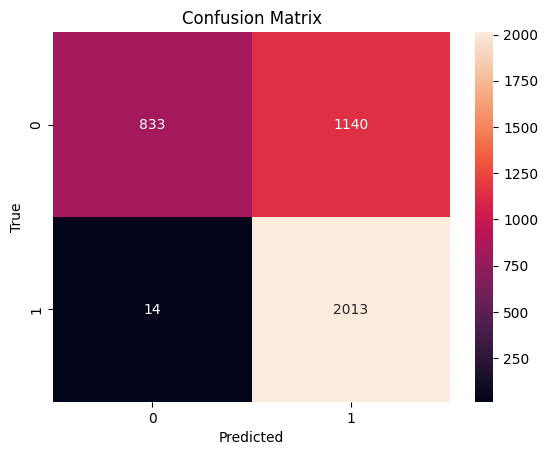

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
# Precision, Recall, and F1-score
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

# You can visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten
from tensorflow.keras.optimizers import Adam
# Parameters
latent_dim = 100  # Dimension of the latent space
adam_lr = 0.0001  # Learning rate for Adam optimizer
adam_beta_1 = 0.5  # Beta 1 hyperparameter for Adam optimizer
#Building the Generator
def build_generator(latent_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(X_train.shape[1], activation='sigmoid'))
    return model
#Building the Discriminator
def build_discriminator(input_shape):
    model = Sequential()
    model.add(Dense(512, input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=adam_lr, beta_1=adam_beta_1), metrics=['accuracy'])
    return model
#Building GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=adam_lr, beta_1=adam_beta_1))
    return model
#Training the GAN
def train_gan(generator, discriminator, gan, X_train, epochs=50, batch_size=64, sample_interval=100):
    half_batch = int(batch_size / 2)

    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        real_data = X_train.iloc[idx]

        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        generated_data = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_data, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(generated_data, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_y = np.array([1] * batch_size)
        g_loss = gan.train_on_batch(noise, valid_y)

        # Print the progress
        #if epoch % sample_interval == 0:
        acc.append(100 * d_loss[1])
        print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}%] [G loss: {g_loss}]")
        #Implementation
X_train_scaled = (X_train - 0.5) * 2
X_train_array = X_train_scaled

generator = build_generator(latent_dim)
discriminator = build_discriminator((X_train.shape[1],))
gan = build_gan(generator, discriminator)

acc=[]

train_gan(generator, discriminator, gan, X_train_array)

1/1 [==============================] - 0s 260ms/step
0 [D loss: 1.6696412563323975, acc.: 68.75%] [G loss: 0.7051518559455872]
1/1 [==============================] - 0s 43ms/step
1 [D loss: 1.8030624389648438, acc.: 29.6875%] [G loss: 0.6874784827232361]
1/1 [==============================] - 0s 29ms/step
2 [D loss: 1.3202929496765137, acc.: 28.125%] [G loss: 0.6715356111526489]
1/1 [==============================] - 0s 33ms/step
3 [D loss: 0.8095228970050812, acc.: 35.9375%] [G loss: 0.6651296019554138]
1/1 [==============================] - 0s 35ms/step
4 [D loss: 0.9479842185974121, acc.: 26.5625%] [G loss: 0.6581846475601196]
1/1 [==============================] - 0s 29ms/step
5 [D loss: 0.4782686084508896, acc.: 43.75%] [G loss: 0.6565754413604736]
1/1 [==============================] - 0s 29ms/step
6 [D loss: 0.6676692962646484, acc.: 25.0%] [G loss: 0.6500293016433716]
1/1 [==============================] - 0s 29ms/step
7 [D loss: 0.4536551162600517, acc.: 48.4375%] [G loss: 0.6

In [ ]:
# Evaluate the discriminator on the test set
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred = discriminator.predict(X_test)
y_pred = (y_pred > 0.5).astype(dtype=int)
#y_pred = y_pred.flatten()
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

y_pred = discriminator.predict(X_test)
y_pred = (y_pred <= 0.5).astype(dtype=int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#y_pred = y_pred.flatten()
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

482/482 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.69      0.02      0.05      7690
           1       0.50      0.99      0.67      7715

    accuracy                           0.51     15405
   macro avg       0.60      0.51      0.36     15405
weighted avg       0.60      0.51      0.36     15405

Precision: 0.50
Recall: 0.99
F1-score: 0.67
Test Accuracy: 50.75%
482/482 [==============================] - 4s 8ms/step
              precision    recall  f1-score   support

           0       0.50      0.98      0.66      7690
           1       0.31      0.01      0.02      7715

    accuracy                           0.49     15405
   macro avg       0.40      0.49      0.34     15405
weighted avg       0.40      0.49      0.34     15405

Precision: 0.31
Recall: 0.01
F1-score: 0.02
Test Accuracy: 49.25%


In [ ]:
X_test_scaled = (X_test - 0.5) * 2
discriminator.evaluate(X_test_scaled, y_test)

482/482 [==============================] - 2s 3ms/step - loss: 2.4109 - accuracy: 0.5018


[2.410870313644409, 0.501785159111023]

range(0, 50)


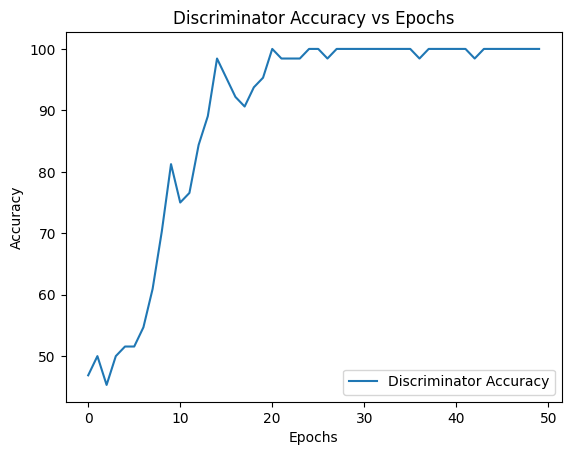

In [ ]:
#Model Evaluation

epochs = range(0, 50)
print(epochs)
plt.plot(epochs, acc, label='Discriminator Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Discriminator Accuracy vs Epochs')
plt.legend()
plt.show()

In [ ]:
#pip install torch torchvision torch-geometric

In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.5 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
# Extract features and labels
X = df.drop('label', axis=1).values # Extract values as numpy array
y = df['label'].values
#scaler = StandardScaler()
#x = scaler.fit_transform(X)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) # Use X instead of x

# Convert to PyTorch tensors
x = torch.tensor(X, dtype=torch.float) # Use X instead of x
y = torch.tensor(y, dtype=torch.long)

# Define the GNN model
class GNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim): # Fix typo _init_ to __init__
        super(GNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x, edge_index): # Fix indentation
        x = self.conv1(x, edge_index)
        x = self.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Assuming you have an edge index (connectivity information)
# For demonstration, let's create a random edge index
edge_index = torch.randint(0, X.shape[0], (2, 10))  # Replace with your actual edge index

# Create a PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, y=y)

# Instantiate the GNN model
input_dim = x.shape[1]
hidden_dim = 64
output_dim = 2  # Assuming binary classification
model = GNN(input_dim, hidden_dim, output_dim)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
num_epochs = 11
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Evaluate the model
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index)
    _, predicted = torch.max(out, dim=1)
    accuracy = accuracy_score(data.y.cpu().numpy(), predicted.cpu().numpy())
    #print("Accuracy: {accuracy * 100:.2f}%")
print(f"Accuracy: {accuracy * 100:.2f}%") # Fix f-string formatting

Epoch 1/11, Loss: 0.9166951179504395
Epoch 2/11, Loss: 2.971083641052246
Epoch 3/11, Loss: 1.4890443086624146
Epoch 4/11, Loss: 0.6909379959106445
Epoch 5/11, Loss: 1.346685528755188
Epoch 6/11, Loss: 1.209769368171692
Epoch 7/11, Loss: 0.7135087847709656
Epoch 8/11, Loss: 0.5547466278076172
Epoch 9/11, Loss: 0.8171718716621399
Epoch 10/11, Loss: 0.9309379458427429
Epoch 11/11, Loss: 0.8098206520080566
Accuracy: 74.60%


Test Accuracy: 74.70%
Precision: 0.67
Recall: 0.98
Confusion Matrix:
[[3943 3747]
 [ 150 7565]]


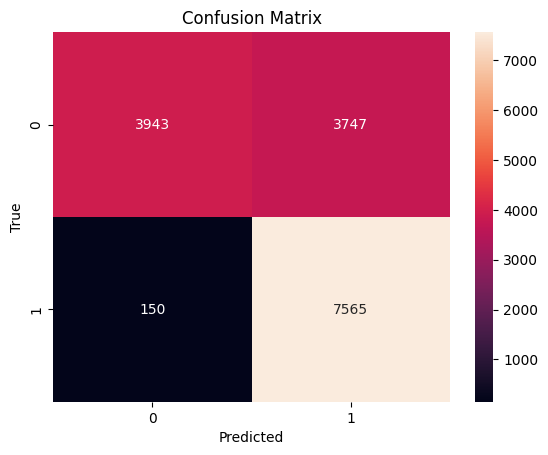

In [ ]:
# Evaluate the model on test data
model.eval()
with torch.no_grad():
    x_test_tensor = torch.tensor(x_test, dtype=torch.float)
    # Replace with your actual edge index for test data
    edge_index_test = torch.randint(0, x_test.shape[0], (2, 10))
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)
    data_test = Data(x=x_test_tensor, edge_index=edge_index_test, y=y_test_tensor)

    out = model(data_test.x, data_test.edge_index)
    _, predicted = torch.max(out, dim=1)

    # Calculate metrics
    accuracy = accuracy_score(data_test.y.cpu().numpy(), predicted.cpu().numpy())
    precision = precision_score(data_test.y.cpu().numpy(), predicted.cpu().numpy())
    recall = recall_score(data_test.y.cpu().numpy(), predicted.cpu().numpy())
    conf_matrix = confusion_matrix(data_test.y.cpu().numpy(), predicted.cpu().numpy())

    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    # You can visualize the confusion matrix using seaborn
    sns.heatmap(conf_matrix, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


2/2 [==============================] - 0s 19ms/step
0 [D loss: 0.7679446935653687 | D accuracy: 23.44%] [G loss: 0.6140058040618896] [GNN loss: 3.4875314235687256]
2/2 [==============================] - 0s 8ms/step
1 [D loss: 0.49088312685489655 | D accuracy: 58.59%] [G loss: 0.606878399848938] [GNN loss: 1.6481804847717285]
2/2 [==============================] - 0s 6ms/step
2 [D loss: 0.4383072294294834 | D accuracy: 53.91%] [G loss: 0.5810760259628296] [GNN loss: 1.8019161224365234]
2/2 [==============================] - 0s 12ms/step
3 [D loss: 0.4169554226100445 | D accuracy: 59.38%] [G loss: 0.60303795337677] [GNN loss: 0.9871358275413513]
2/2 [==============================] - 0s 7ms/step
4 [D loss: 0.41208335384726524 | D accuracy: 60.16%] [G loss: 0.5928593873977661] [GNN loss: 1.0632014274597168]
2/2 [==============================] - 0s 6ms/step
5 [D loss: 0.43538169004023075 | D accuracy: 54.69%] [G loss: 0.5978823900222778] [GNN loss: 1.1569108963012695]
2/2 [===============

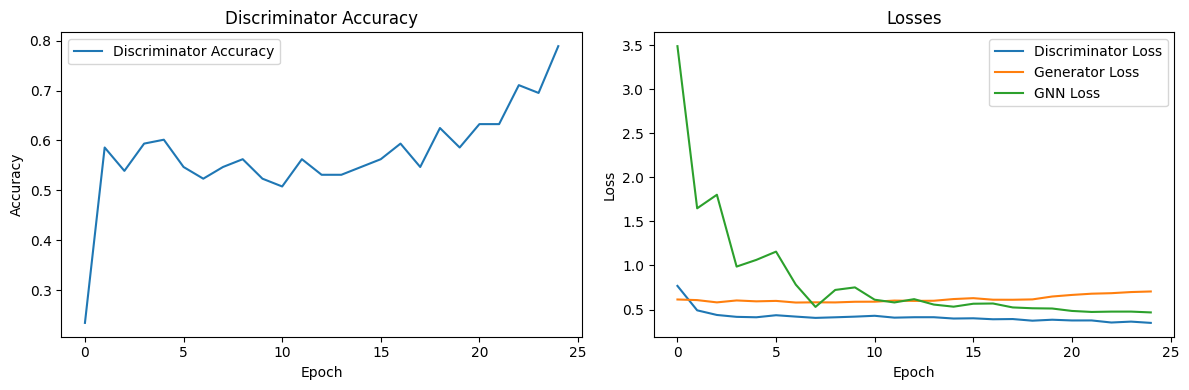

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, LeakyReLU
from keras.models import Model
from keras.optimizers import Adam
from keras import regularizers

# Initialize lists to store metrics
d_losses = []
d_accuracies = []
g_losses = []
gnn_losses = []
# Build the generator
def build_generator(latent_dim, output_dim):
    input = Input(shape=(latent_dim,))
    x = Dense(128)(input)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dense(output_dim, activation='tanh')(x)
    model = Model(input, x)
    return model

# Build the discriminator
def build_discriminator(input_dim):
    input = Input(shape=(input_dim,))
    x = Dense(128)(input)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(input, x)
    return model

# Define the GNN model
class GNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = self.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Parameters
input_dim = X_train.shape[1]
latent_dim = 100
epochs = 25
batch_size = 64
hidden_dim = 64
output_dim = 2  # Assuming binary classification

# Build and compile the discriminator
discriminator = build_discriminator(input_dim)
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Build the generator
generator = build_generator(latent_dim, input_dim)

# Instantiate the GNN model
gnn_model = GNN(input_dim, hidden_dim, output_dim)
gnn_optimizer = optim.Adam(gnn_model.parameters(), lr=0.01)

# Build and compile the GAN
z = Input(shape=(latent_dim,))
generated_data = generator(z)
discriminator.trainable = False
validity = discriminator(generated_data)
combined = Model(z, validity)
combined.compile(optimizer='adam', loss='binary_crossentropy')

# Training the Hybrid Model
for epoch in range(epochs):
    # Train the discriminator
    # Train the discriminator
    idx = np.random.randint(0, X_train.shape[0], batch_size) # Use df instead of X_train
    real_data = df.iloc[idx, :-1].values # Select all columns except the label and extract values
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_data = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(real_data, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_data, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_y = np.ones((batch_size, 1))
    g_loss = combined.train_on_batch(noise, valid_y)

    # Train the GNN
    gnn_optimizer.zero_grad()
    out = gnn_model(data.x, data.edge_index)
    gnn_loss = nn.CrossEntropyLoss()(out, data.y)
    gnn_loss.backward()
    gnn_optimizer.step()
    # Store metrics
    d_losses.append(d_loss[0])
    d_accuracies.append(d_loss[1])
    g_losses.append(g_loss)
    gnn_losses.append(gnn_loss.item())
    print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]:.2f}%] [G loss: {g_loss}] [GNN loss: {gnn_loss.item()}]")
# Plotting
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(d_accuracies, label='Discriminator Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Discriminator Accuracy')
plt.legend()

# Plot losses
plt.subplot(1, 2, 2)
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.plot(gnn_losses, label='GNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# prompt: evaluate hybrid models ferformance on test data

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have X_test and y_test available from the previous code

# Generate synthetic data using the generator
noise = np.random.normal(0, 1, (X_test.shape[0], latent_dim))
generated_data = generator.predict(noise)

# Combine real and generated data for GNN evaluation
X_combined = np.concatenate((X_test, generated_data), axis=0)
y_combined = np.concatenate((y_test, np.zeros(generated_data.shape[0])), axis=0)  # Assuming generated data is labeled as 0

# Convert to PyTorch tensors
x_combined_tensor = torch.tensor(X_combined, dtype=torch.float)
y_combined_tensor = torch.tensor(y_combined, dtype=torch.long)

# Create a PyTorch Geometric Data object for the combined data
# Assuming you have the edge index for X_test (replace with your actual edge index)
edge_index_test = torch.randint(0, X_test.shape[0], (2, 10))
data_combined = Data(x=x_combined_tensor, edge_index=edge_index_test, y=y_combined_tensor)

# Evaluate the GNN on the combined data
gnn_model.eval()
with torch.no_grad():
    out = gnn_model(data_combined.x, data_combined.edge_index)
    _, predicted = torch.max(out, dim=1)
    accuracy = accuracy_score(data_combined.y.cpu().numpy(), predicted.cpu().numpy())
    precision = precision_score(data_combined.y.cpu().numpy(), predicted.cpu().numpy())
    recall = recall_score(data_combined.y.cpu().numpy(), predicted.cpu().numpy())
    f1 = f1_score(data_combined.y.cpu().numpy(), predicted.cpu().numpy())

print(f"Hybrid Model Accuracy: {accuracy * 100:.2f}%")
print(f"Hybrid Model Precision: {precision:.2f}")
print(f"Hybrid Model Recall: {recall:.2f}")
print(f"Hybrid Model F1-score: {f1:.2f}")


482/482 [==============================] - 1s 2ms/step
Hybrid Model Accuracy: 64.15%
Hybrid Model Precision: 0.35
Hybrid Model Recall: 0.50
Hybrid Model F1-score: 0.41
